In [1]:
#import relevant libraries 
import pandas as pd
import numpy as np
import math

# load csv file from data_file.csv
position_data = pd.read_csv("data_file.csv") 
print(position_data.head(10))

# assign coordinates to variables
coordinate_x = position_data.x.copy()
coordinate_y = position_data.y.copy()

# declare cordinates of base stations
BS_1 = (-1, -1)
BS_2 = (56325, 9)

# calculate the distance between car i and car j
dis_car_ij = np.zeros((len(coordinate_x),len(coordinate_x)))
rate_car_ij = np.zeros((len(coordinate_x),len(coordinate_x)))
for i in range(len(coordinate_x)):
    for j in range(len(coordinate_x)):
        dis_car_ij[i][j] = math.sqrt((abs(coordinate_x[i] - coordinate_x[j])) ** 2 + (abs(coordinate_y[i] - coordinate_y[j])) ** 2)

        # Here is to calculate the transmission rate according to the distance
        if dis_car_ij[i][j] < 500:
            rate_car_ij[i][j] = 10
        elif dis_car_ij[i][j] >= 500 and dis_car_ij[i][j] < 1000:
            rate_car_ij[i][j] = 8
        elif dis_car_ij[i][j] >= 1000 and dis_car_ij[i][j] < 2000:
            rate_car_ij[i][j] = 6
        elif dis_car_ij[i][j] >= 2000 and dis_car_ij[i][j] < 3000:
            rate_car_ij[i][j] = 4
        elif dis_car_ij[i][j] >= 3000 and dis_car_ij[i][j] < 4000:
            rate_car_ij[i][j] = 2
        elif dis_car_ij[i][j] >= 4000 and dis_car_ij[i][j] < 6000:
            rate_car_ij[i][j] = 1
        elif dis_car_ij[i][j] >= 6000:
            rate_car_ij[i][j] = 0
print('\n'.join(['   '.join(['{:4}'.format(item) for item in row]) for row in dis_car_ij]))

print('\n'.join(['   '.join(['{:4}'.format(item) for item in row]) for row in rate_car_ij]))

   No.            x         y
0    1     0.000000  8.157657
1    2  1400.124877  6.107682
2    3  3300.805188  4.148334
3    4  3701.634008  6.147944
4    5  4102.583249  6.088959
5    6  4202.800929  4.170082
6    7  4803.101556  2.098907
7    8  5603.688004  6.189632
8    9  6403.874407  6.159558
9   10  8104.029001  6.026609
 0.0   1400.1263777213621   3300.807622960825   3701.63455356241   4102.583770562924   4202.802820684817   4803.1053773261165   5603.688349586997   6403.874718717556   8104.0292811918025   9504.178987240859   9604.929731832699   9705.071935395403   9805.88066161424   10806.545970189169   11607.34896006512   12107.374967781041   13208.085210010335   14708.956147688472   16709.05924351327   16809.797355154144   17810.47607844315   18110.51168602089   19410.588227336564   19710.820883855682   21611.35134280455   23011.967945791275   23512.202377935984   24912.2397426759   25912.74698523473   27913.60860027348   28414.368351960795   30015.044813499637   31715.630740

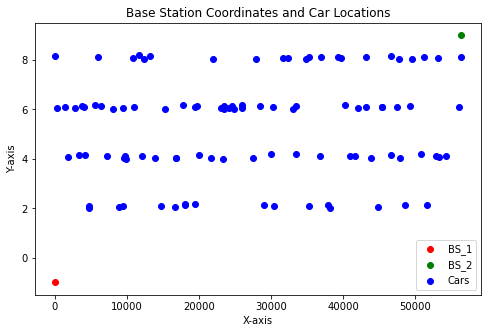

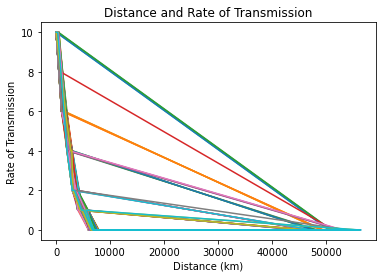

In [2]:
#import relevant library
import matplotlib.pyplot as plt

# Create a plot
plt.figure(figsize=(8, 5))

# Plot the base station coordinates
plt.scatter(BS_1[0], BS_1[1], label='BS_1', color='red')
plt.scatter(BS_2[0], BS_2[1], label='BS_2', color='green')

# Add the car coordinates
plt.scatter(coordinate_x, coordinate_y, label='Cars', color='blue')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Base Station Coordinates and Car Locations')
plt.legend()

# Show the plot
plt.show()

# Create a line plot of distance vs transmission rate
plt.plot(dis_car_ij, rate_car_ij)

# Add title and labels
plt.title('Distance and Rate of Transmission')
plt.xlabel('Distance (km)')
plt.ylabel('Rate of Transmission')

# Show the plot
plt.show()

## Implementation of Algorithm

In [4]:
# import relevant library
import networkx as nx

# Function to calculate the transmission rate
def calculate_rate(distance):
    if distance < 500:
        return 10
    elif distance < 1000:
        return 8
    elif distance < 2000:
        return 6
    elif distance < 3000:
        return 4
    elif distance < 4000:
        return 2
    elif distance < 6000:
        return 1
    else:
        return 0

# Create a graph
G = nx.DiGraph()

# Add edges between cars
num_cars = len(coordinate_x)
for i in range(num_cars):
    for j in range(num_cars):
        if i != j:
            distance = math.sqrt((coordinate_x[i] - coordinate_x[j]) ** 2 + (coordinate_y[i] - coordinate_y[j]) ** 2)
            rate = calculate_rate(distance)
            if rate > 0:
                weight = distance / rate  # Combining distance and rate
                G.add_edge(i, j, weight=weight)

# Add edges to base stations
for i in range(num_cars):
    dist_to_BS1 = math.sqrt((coordinate_x[i] - BS_1[0]) ** 2 + (coordinate_y[i] - BS_1[1]) ** 2)
    rate_to_BS1 = calculate_rate(dist_to_BS1)
    G.add_edge(i, 'BS1', weight=dist_to_BS1 / rate_to_BS1 if rate_to_BS1 > 0 else float('inf'))

    dist_to_BS2 = math.sqrt((coordinate_x[i] - BS_2[0]) ** 2 + (coordinate_y[i] - BS_2[1]) ** 2)
    rate_to_BS2 = calculate_rate(dist_to_BS2)
    G.add_edge(i, 'BS2', weight=dist_to_BS2 / rate_to_BS2 if rate_to_BS2 > 0 else float('inf'))

# Function to find best path for each car
def determine_best_path(path1, path2, G):
    weight1 = sum(G[u][v]['weight'] for u, v in zip(path1[:-1], path1[1:]))
    weight2 = sum(G[u][v]['weight'] for u, v in zip(path2[:-1], path2[1:]))
    return path1 if weight1 < weight2 else path2

def find_best_paths(G, num_cars):
    best_paths = {}
    for car in range(num_cars):
        path_to_BS1 = nx.dijkstra_path(G, source=car, target='BS1', weight='weight')
        path_to_BS2 = nx.dijkstra_path(G, source=car, target='BS2', weight='weight')
        best_paths[car] = determine_best_path(path_to_BS1, path_to_BS2, G)
    return best_paths
# best_paths will contain the optimal path for each car to either BS1 or BS2

## Graph Representation

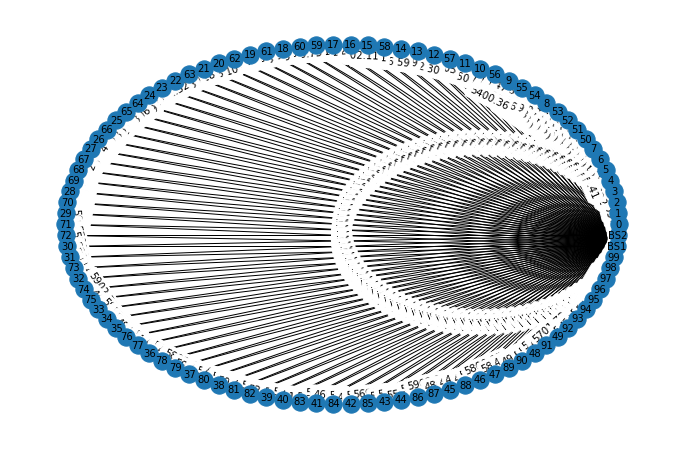

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import math

# As coordinate_x, coordinate_y, BS_1, BS_2, calculate_rate functions are already defined

# Create a graph
G = nx.DiGraph()

# Add edges between cars
num_cars = len(coordinate_x)
for i in range(num_cars):
    for j in range(num_cars):
        if i != j:
            distance = math.sqrt((coordinate_x[i] - coordinate_x[j]) ** 2 + (coordinate_y[i] - coordinate_y[j]) ** 2)
            rate = calculate_rate(distance)
            if rate > 0:
                weight = distance / rate  # Combining distance and rate
                G.add_edge(i, j, weight=weight)

# Add edges to base stations
for i in range(num_cars):
    dist_to_BS1 = math.sqrt((coordinate_x[i] - BS_1[0]) ** 2 + (coordinate_y[i] - BS_1[1]) ** 2)
    rate_to_BS1 = calculate_rate(dist_to_BS1)
    G.add_edge(i, 'BS1', weight=dist_to_BS1 / rate_to_BS1 if rate_to_BS1 > 0 else float('inf'))

    dist_to_BS2 = math.sqrt((coordinate_x[i] - BS_2[0]) ** 2 + (coordinate_y[i] - BS_2[1]) ** 2)
    rate_to_BS2 = calculate_rate(dist_to_BS2)
    G.add_edge(i, 'BS2', weight=dist_to_BS2 / rate_to_BS2 if rate_to_BS2 > 0 else float('inf'))
    
# Visualize the graph with edge labels
plt.figure(figsize=(12, 8))

# Use Circular layout for node positioning
pos = nx.circular_layout(G)

# Draw nodes
nx.draw_networkx_nodes(G, pos=pos, node_size=300)

# Draw edges with weights (without arrows)
nx.draw_networkx_edges(G, pos=pos, edge_color='black', width=1.0, arrows=False)
edge_labels = {(u, v): f'{d["weight"]:.2f}' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)

# Add labels to nodes
nx.draw_networkx_labels(G, pos=pos, font_size=10, font_color='black')

plt.axis('off')  # Turn off the axis for better visualization
plt.show()


In [6]:
# Code for Running the Experiments and Results with Dijkstra's Algorithm:

import pandas as pd
import numpy as np
import math
import networkx as nx
import matplotlib.pyplot as plt

# Load the data
position_data = pd.read_csv("data_file.csv")
coordinate_x = position_data.x.copy()
coordinate_y = position_data.y.copy()

# Base station coordinates
BS_1 = (-1, -1)
BS_2 = (56325, 9)

# Function to calculate the transmission rate
def calculate_rate(distance):
    if distance < 500:
        return 10
    elif distance < 1000:
        return 8
    elif distance < 2000:
        return 6
    elif distance < 3000:
        return 4
    elif distance < 4000:
        return 2
    elif distance < 6000:
        return 1
    else:
        return 0

# Create a graph
G = nx.DiGraph()

# Add edges between cars
num_cars = len(coordinate_x)
for i in range(num_cars):
    for j in range(num_cars):
        if i != j:
            distance = math.sqrt((coordinate_x[i] - coordinate_x[j]) ** 2 + (coordinate_y[i] - coordinate_y[j]) ** 2)
            rate = calculate_rate(distance)
            if rate > 0:
                weight = distance / rate  # Combining distance and rate
                G.add_edge(i, j, weight=weight)

# Add edges to base stations
for i in range(num_cars):
    dist_to_BS1 = math.sqrt((coordinate_x[i] - BS_1[0]) ** 2 + (coordinate_y[i] - BS_1[1]) ** 2)
    rate_to_BS1 = calculate_rate(dist_to_BS1)
    G.add_edge(i, 'BS1', weight=dist_to_BS1 / rate_to_BS1 if rate_to_BS1 > 0 else float('inf'))

    dist_to_BS2 = math.sqrt((coordinate_x[i] - BS_2[0]) ** 2 + (coordinate_y[i] - BS_2[1]) ** 2)
    rate_to_BS2 = calculate_rate(dist_to_BS2)
    G.add_edge(i, 'BS2', weight=dist_to_BS2 / rate_to_BS2 if rate_to_BS2 > 0 else float('inf'))

# Function to find best path for each car
def determine_best_path(path1, path2, G):
    weight1 = sum(G[u][v]['weight'] for u, v in zip(path1[:-1], path1[1:]))
    weight2 = sum(G[u][v]['weight'] for u, v in zip(path2[:-1], path2[1:]))
    return path1 if weight1 < weight2 else path2

def find_best_paths(G, num_cars):
    best_paths = {}
    for car in range(num_cars):
        path_to_BS1 = nx.dijkstra_path(G, source=car, target='BS1', weight='weight')
        path_to_BS2 = nx.dijkstra_path(G, source=car, target='BS2', weight='weight')
        best_paths[car] = determine_best_path(path_to_BS1, path_to_BS2, G)
    return best_paths

best_paths = find_best_paths(G, num_cars)

print(best_paths)

# best_paths will contain the optimal path for each car to either BS1 or BS2

{0: [0, 'BS1'], 1: [1, 50, 'BS1'], 2: [2, 52, 51, 1, 50, 'BS1'], 3: [3, 2, 52, 51, 1, 50, 'BS1'], 4: [4, 3, 2, 52, 51, 1, 50, 'BS1'], 5: [5, 4, 3, 2, 52, 51, 1, 50, 'BS1'], 6: [6, 53, 5, 4, 3, 2, 52, 51, 1, 50, 'BS1'], 7: [7, 6, 53, 5, 4, 3, 2, 52, 51, 1, 50, 'BS1'], 8: [8, 54, 7, 6, 53, 5, 4, 3, 2, 52, 51, 1, 50, 'BS1'], 9: [9, 55, 8, 54, 7, 6, 53, 5, 4, 3, 2, 52, 51, 1, 50, 'BS1'], 10: [10, 57, 56, 9, 55, 8, 54, 7, 6, 53, 5, 4, 3, 2, 52, 51, 1, 50, 'BS1'], 11: [11, 57, 56, 9, 55, 8, 54, 7, 6, 53, 5, 4, 3, 2, 52, 51, 1, 50, 'BS1'], 12: [12, 57, 56, 9, 55, 8, 54, 7, 6, 53, 5, 4, 3, 2, 52, 51, 1, 50, 'BS1'], 13: [13, 57, 56, 9, 55, 8, 54, 7, 6, 53, 5, 4, 3, 2, 52, 51, 1, 50, 'BS1'], 14: [14, 13, 57, 56, 9, 55, 8, 54, 7, 6, 53, 5, 4, 3, 2, 52, 51, 1, 50, 'BS1'], 15: [15, 58, 14, 13, 57, 56, 9, 55, 8, 54, 7, 6, 53, 5, 4, 3, 2, 52, 51, 1, 50, 'BS1'], 16: [16, 15, 58, 14, 13, 57, 56, 9, 55, 8, 54, 7, 6, 53, 5, 4, 3, 2, 52, 51, 1, 50, 'BS1'], 17: [17, 59, 16, 15, 58, 14, 13, 57, 56, 9, 55, 8

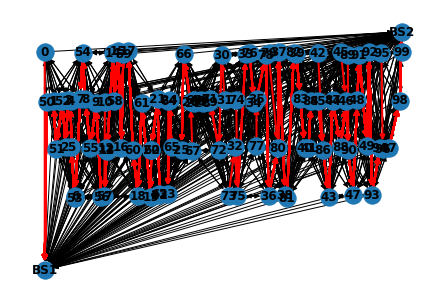

In [7]:
# Create a function to visualize the optimal paths for Dijkstra's algorithm

import matplotlib.pyplot as plt

# Function to plot the optimal paths on the graph
def plot_optimal_paths(G, best_paths, BS_1, BS_2):
    pos = {i: (coordinate_x[i], coordinate_y[i]) for i in range(num_cars)}
    pos['BS1'] = BS_1
    pos['BS2'] = BS_2

    nx.draw(G, pos, with_labels=True, font_weight='bold')

    for car, path in best_paths.items():
        path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

    plt.show()

# Plot the optimal paths on the graph
plot_optimal_paths(G, best_paths, BS_1, BS_2)